# Boosting Algorithms Project

**Goal:** After improving the 'Decision Tree' model with the 'Random Forest' optimisation, in this assessment will try to apply the 'Boosting Algorithm' machine learning model to train the dataset and compare the performance with the two previous ones, by comparing 'accuracy'.

This view would allow us to improve the effectiveness of the model when an individual tree or a random forest model are not sufficient.

------------------------------------------------------------------------------------

**Step 0:** Calling the dataset

In [3]:
import pandas as pd
# Reload datasets
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2.0,84.0,72.0,27.235457,32.3,0.304,21.0,0
1,9.0,112.0,82.0,24.000000,28.2,1.282,50.0,1
2,1.0,139.0,46.0,19.000000,28.7,0.654,22.0,0
3,0.0,161.0,50.0,27.235457,21.9,0.254,65.0,0
4,6.0,134.0,80.0,37.000000,46.2,0.238,46.0,1


**Step 1: Applying the Reloaded 'Decision Tree' Model**

First, we will evaluate the performance of the reloaded Decision Tree model over the training and testing datasets. This includes computing the confusion matrix, classification report, and accuracy.

In [4]:
# Reloading the 'Decision Tree' model:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from pickle import load

DT_loaded_model = load(open("../models/tree_classifier_crit-entropy_maxdepth-5_minleaf-4_minsplit2_42.sav", "rb"))

In [5]:
# Separation of the target variable from the dataset:
X_train = train_data.drop("Outcome", axis=1)
y_train = train_data["Outcome"]
X_test = test_data.drop("Outcome", axis=1)
y_test = test_data["Outcome"]


DT_loaded_model = DecisionTreeClassifier(
    criterion="entropy", max_depth=5, min_samples_leaf=4, min_samples_split=2, random_state=42
)
DT_loaded_model.fit(X_train, y_train)

# Predictions on train and test datasets
y_train_pred = DT_loaded_model.predict(X_train)
y_test_pred = DT_loaded_model.predict(X_test)

# Training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy (Decision Tree): {train_accuracy:.2f}")

# Test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy (Decision Tree): {test_accuracy:.2f}")

Training Accuracy (Decision Tree): 0.88
Test Accuracy (Decision Tree): 0.75



Classification Report (Test Data - Decision Tree):
              precision    recall  f1-score   support

 No Diabetes       0.79      0.84      0.81        99
    Diabetes       0.67      0.60      0.63        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



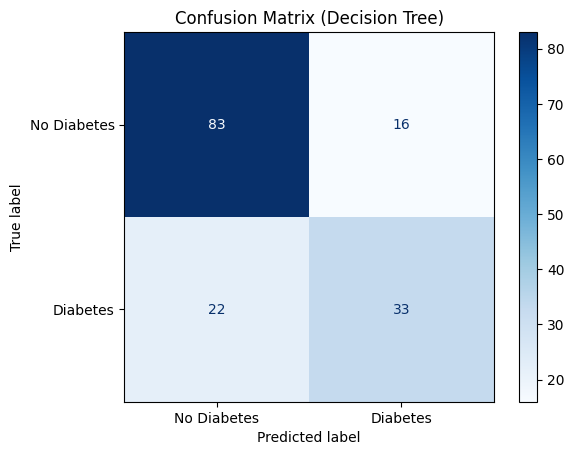

In [6]:
# Classification report
print("\nClassification Report (Test Data - Decision Tree):")
print(classification_report(y_test, y_test_pred, target_names=["No Diabetes", "Diabetes"]))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["No Diabetes", "Diabetes"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix (Decision Tree)")
plt.show()

**Step 2: Optimizing the 'Decision Tree' Model**

We will follow the provided GridSearchCV workflow to optimize the Decision Tree model and compare its performance.

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define hyperparameters
hyperparams = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": [None, "sqrt", "log2"]
}

# Initialize the model
tree_model = DecisionTreeClassifier(random_state=42)

# Set up GridSearchCV
grid = GridSearchCV(
    estimator=tree_model,
    param_grid=hyperparams,
    scoring="accuracy",
    cv=10,
    verbose=1,
    refit=True
)

# Fit the grid search to the training data
grid.fit(X_train, y_train)

# Display the best hyperparameters and the corresponding score
print(f"Best Hyperparameters: {grid.best_params_}")
print(f"Best CV Accuracy: {grid.best_score_:.2f}")

Fitting 10 folds for each of 216 candidates, totalling 2160 fits


Best Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best CV Accuracy: 0.81


In [8]:
# Retrieve the best model
best_model = grid.best_estimator_

# Evaluate the optimized Decision Tree model
y_train_pred_opt = best_model.predict(X_train)
train_accuracy_opt = accuracy_score(y_train, y_train_pred_opt)
print(f"Training Accuracy (Optimized Decision Tree): {train_accuracy_opt:.2f}")

y_test_pred_opt = best_model.predict(X_test)
test_accuracy_opt = accuracy_score(y_test, y_test_pred_opt)
print(f"Test Accuracy (Optimized Decision Tree): {test_accuracy_opt:.2f}")

Training Accuracy (Optimized Decision Tree): 0.90
Test Accuracy (Optimized Decision Tree): 0.73



Classification Report (Optimized Decision Tree):
              precision    recall  f1-score   support

 No Diabetes       0.81      0.75      0.78        99
    Diabetes       0.60      0.69      0.64        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.74      0.73      0.73       154



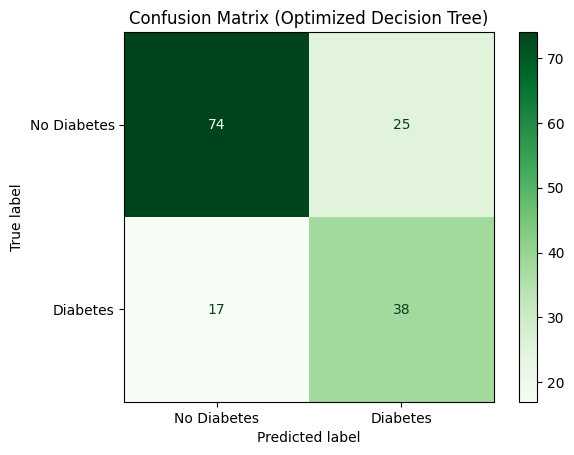

In [9]:
# Classification report:
print("\nClassification Report (Optimized Decision Tree):")
print(classification_report(y_test, y_test_pred_opt, target_names=["No Diabetes", "Diabetes"]))

# Confusion matrix:
conf_matrix_opt = confusion_matrix(y_test, y_test_pred_opt)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_opt, display_labels=["No Diabetes", "Diabetes"])
disp.plot(cmap="Greens")
plt.title("Confusion Matrix (Optimized Decision Tree)")
plt.show()

**Step 3: Applying the Reloaded 'Random Forest' Model**

In [10]:
# Load the Random Forest model
rf_model = load(open("../models/random_forest_nestimators-60_rs-42.sav", "rb"))
print("Random Forest model loaded successfully!")

Random Forest model loaded successfully!


In [11]:
# Evaluate the Random Forest model
# Predictions on train and test datasets
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Training accuracy
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
print(f"Training Accuracy (Random Forest): {train_accuracy_rf:.2f}")

# Test accuracy
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
print(f"Test Accuracy (Random Forest): {test_accuracy_rf:.2f}")

Training Accuracy (Random Forest): 1.00
Test Accuracy (Random Forest): 0.81



Classification Report (Test Data - Random Forest):
              precision    recall  f1-score   support

 No Diabetes       0.86      0.85      0.85        99
    Diabetes       0.73      0.75      0.74        55

    accuracy                           0.81       154
   macro avg       0.79      0.80      0.80       154
weighted avg       0.81      0.81      0.81       154



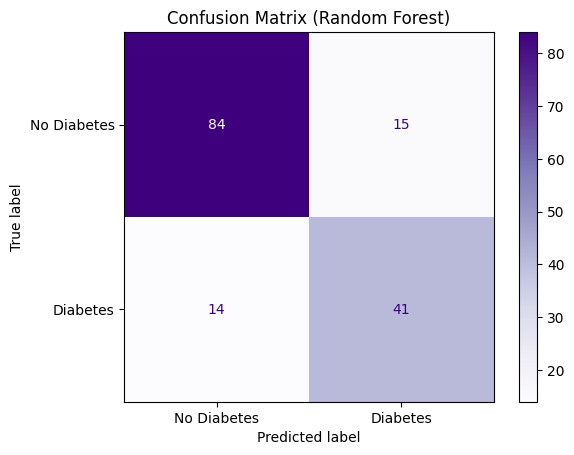

In [12]:
# Classification report for test data
print("\nClassification Report (Test Data - Random Forest):")
print(classification_report(y_test, y_test_pred_rf, target_names=["No Diabetes", "Diabetes"]))

# Confusion matrix for test data
conf_matrix_rf = confusion_matrix(y_test, y_test_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels=["No Diabetes", "Diabetes"])
disp_rf.plot(cmap="Purples")
plt.title("Confusion Matrix (Random Forest)")
plt.show()

-------------------------------------------------------------------------------------------------------------------------------

**Step 4: Building 'Boosting Algorithm'**


In [13]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize the XGBoost model
boosting_model = XGBClassifier(n_estimators=200, learning_rate=0.001, random_state=42)
print("XGBoost model initialized successfully!")

XGBoost model initialized successfully!


In [ ]:
# Train the model:
boosting_model.fit(X_train, y_train)
print("Boosting model trained successfully!")

Boosting model trained successfully!


In [ ]:
# Predictions on train and test datasets:
y_train_pred_boost = boosting_model.predict(X_train)
y_test_pred_boost = boosting_model.predict(X_test)

In [24]:
# Training - accuracy:
train_accuracy_boost = accuracy_score(y_train, y_train_pred_boost)
print(f"Training Accuracy (Boosting Algorithm): {train_accuracy_boost:.2f}")

# Test - accuracy:
test_accuracy_boost = accuracy_score(y_test, y_test_pred_boost)
print(f"Test Accuracy (Boosting Algorithm): {test_accuracy_boost:.2f}")

Training Accuracy (Boosting Algorithm): 0.65
Test Accuracy (Boosting Algorithm): 0.64



Classification Report (Test Data - Boosting Algorithm):
              precision    recall  f1-score   support

 No Diabetes       0.64      1.00      0.78        99
    Diabetes       0.00      0.00      0.00        55

    accuracy                           0.64       154
   macro avg       0.32      0.50      0.39       154
weighted avg       0.41      0.64      0.50       154



/home/vscode/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vscode/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vscode/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


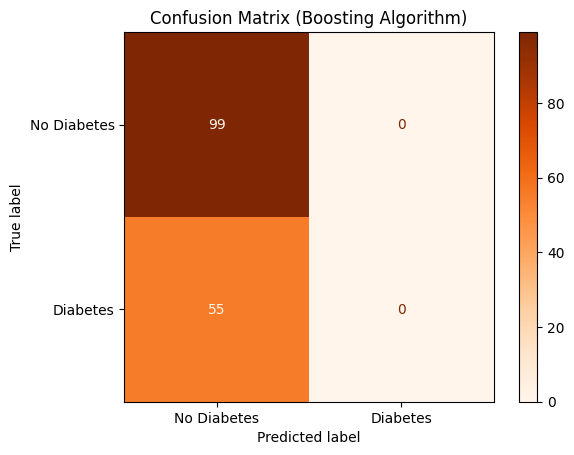

In [17]:
# Classification report for test data
print("\nClassification Report (Test Data - Boosting Algorithm):")
print(classification_report(y_test, y_test_pred_boost, target_names=["No Diabetes", "Diabetes"]))


# Confusion matrix for test data
conf_matrix_boost = confusion_matrix(y_test, y_test_pred_boost)
disp_boost = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_boost, display_labels=["No Diabetes", "Diabetes"])
disp_boost.plot(cmap="Oranges")
plt.title("Confusion Matrix (Boosting Algorithm)")
plt.show()

First result are a bit odd. Will proceed to review the model and perform an optimisation:

**Step 5: Boosting Algorithm' optimisation:**

Will modify the main two hyperparameters:

- <ins>n_estimators:</ins> This is probably the most important hyperparameter. It defines the number of decision trees in the forest. In general, a larger number of trees increases the accuracy and makes the predictions more stable.


- <ins>learning_rate (learning_rate in XGBoost):</ins> The rate at which the model is accepted at each boosting stage. A higher learning rate may lead to a more complex model, while a lower rate will require more trees to obtain the same level of complexity.




Will implement an automatic permutation of the following values for the hyperparameters:

**n_estimators_values =** [50, 100, 200, 300, 500]

**learning_rate_values =** [0.001, 0.01, 0.05, 0.1, 0.2]

In [18]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Define parameter grid
n_estimators_values = [50, 100, 200, 300, 500]
learning_rate_values = [0.001, 0.01, 0.05, 0.1, 0.2]

# Store results
results = []

for n in n_estimators_values:
    for lr in learning_rate_values:
        # Train XGBoost model
        model = XGBClassifier(n_estimators=n, learning_rate=lr, random_state=42)
        model.fit(X_train, y_train)
        
        # Evaluate on train and test sets
        train_accuracy = accuracy_score(y_train, model.predict(X_train))
        test_accuracy = accuracy_score(y_test, model.predict(X_test))
        
        # Append results
        results.append({"n_estimators": n, "learning_rate": lr, 
                        "train_accuracy": train_accuracy, 
                        "test_accuracy": test_accuracy})

# Convert results to DataFrame for easier analysis
results_df = pd.DataFrame(results)

# Display results
print(results_df.sort_values(by="test_accuracy", ascending=False))

    n_estimators  learning_rate  train_accuracy  test_accuracy
13           200          0.100        1.000000       0.811688
18           300          0.100        1.000000       0.805195
21           500          0.010        0.985342       0.805195
8            100          0.100        0.998371       0.798701
17           300          0.050        1.000000       0.798701
9            100          0.200        1.000000       0.798701
12           200          0.050        1.000000       0.798701
23           500          0.100        1.000000       0.798701
3             50          0.100        0.986971       0.798701
7            100          0.050        0.983713       0.792208
2             50          0.050        0.965798       0.792208
22           500          0.050        1.000000       0.792208
14           200          0.200        1.000000       0.785714
19           300          0.200        1.000000       0.785714
4             50          0.200        0.998371       0

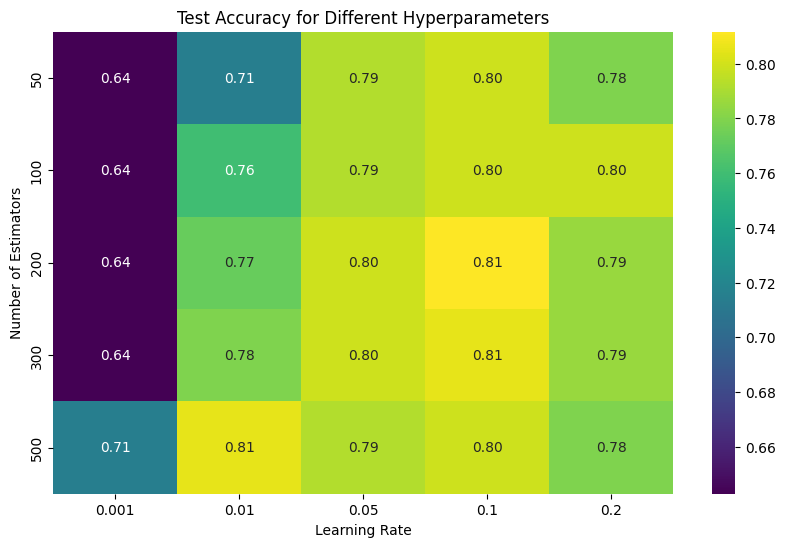

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot the DataFrame for visualization
pivot_df = results_df.pivot(index="n_estimators", columns="learning_rate", values="test_accuracy")

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df, annot=True, fmt=".2f", cmap="viridis", cbar=True)
plt.title("Test Accuracy for Different Hyperparameters")
plt.xlabel("Learning Rate")
plt.ylabel("Number of Estimators")
plt.show()

# Conclusions:


<ins>Boosting Algorithm</ins> is probably not the best model for our dataset, given the size and complexity of the data given. For this purpose <ins>I would probably choose 'Random FOrest'</ins>.

However, after optimisation, 'Boosting Algorith' has considerably improved its firs result demonstrating that <ins>more trees increases the accuracy of the model</ins>.

Best Hyperparameters: n_estimators=200, learning_rate=0.1


<Figure size 800x600 with 0 Axes>

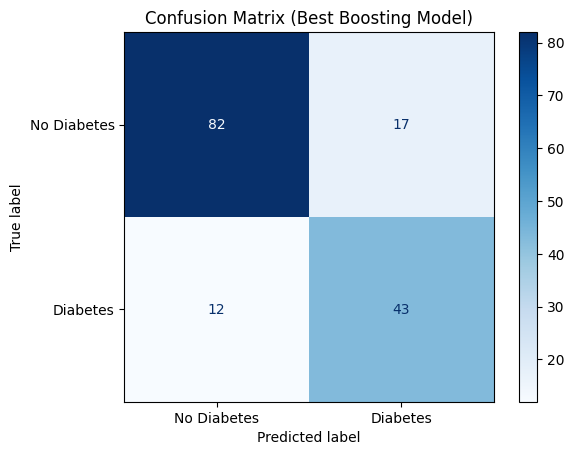

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Identify the best hyperparameters
best_row = results_df.loc[results_df["test_accuracy"].idxmax()]
best_n_estimators = int(best_row["n_estimators"])
best_learning_rate = best_row["learning_rate"]

print(f"Best Hyperparameters: n_estimators={best_n_estimators}, learning_rate={best_learning_rate}")

# Re-train the model with the best hyperparameters
best_model = XGBClassifier(n_estimators=best_n_estimators, learning_rate=best_learning_rate, random_state=42)
best_model.fit(X_train, y_train)

# Predict on the test set
y_test_pred_best = best_model.predict(X_test)

# Generate the confusion matrix
conf_matrix_best = confusion_matrix(y_test, y_test_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_best, display_labels=["No Diabetes", "Diabetes"])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap="Blues")
plt.title("Confusion Matrix (Best Boosting Model)")
plt.show()